In [1]:
# if the data_creation pipline has properly been done, 
# you can visualize the various parts in this notebook

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import global_variables as gv
from render_wt_pt_proj import run_proj


In [5]:
# key parameters
dataset = 'pascal3D'
class_name = 'chair'
subset = 'pascal'

(10, 3)


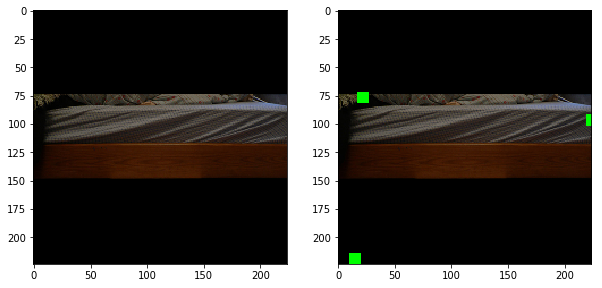

In [3]:
## bbox image and sparse keypoints
if dataset=='pascal3D':
    save_name = class_name+'_'+subset
else:
    save_name = class_name
img_loc = os.path.join('../data/real_data/',dataset,save_name,'images')
keypoint_loc = os.path.join('../data/real_data/',dataset,save_name,'sparse_keypoints')
img_list = os.listdir(keypoint_loc)
i = np.random.choice(range(len(img_list)))
sample = img_list[i]
img = cv2.imread(os.path.join(img_loc,sample.split('.')[0]+'.png'))
keypoints = np.load(os.path.join(keypoint_loc,sample))
keypoints = keypoints.astype(int)
m = 5
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
print(keypoints.shape)
for i in range(keypoints.shape[0]):
    img[keypoints[i,1]-m:keypoints[i,1]+m,keypoints[i,0]-m:keypoints[i,0]+m] = (0,255,0)
plt.subplot(1,2,2)
plt.imshow(img[:,:,::-1])

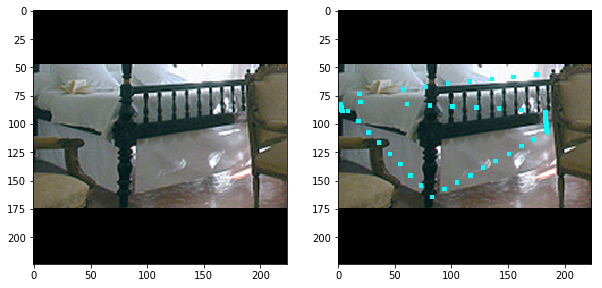

In [4]:
## dense keypoints for real images
if dataset=='pascal3D':
    save_name = class_name+'_'+subset
else:
    save_name = class_name
img_loc = os.path.join('../data/real_data/',dataset,save_name,'images')
keypoint_loc = os.path.join('../data/real_data/',dataset,save_name,'dense_keypoints')
img_list = os.listdir(keypoint_loc)
i = np.random.choice(range(len(img_list)))
sample = img_list[i]
img = cv2.imread(os.path.join(img_loc,sample.split('.')[0]+'.png'))
keypoints = np.load(os.path.join(keypoint_loc,sample))
keypoints = keypoints.astype(int)
m = 2
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
for i in range(keypoints.shape[1]):
    img[keypoints[1,i]-m:keypoints[1,i]+m,keypoints[0,i]-m:keypoints[0,i]+m] = (255,255,0)
plt.subplot(1,2,2)
plt.imshow(img[:,:,::-1])

('Pose: Azimuth ', '120.653', ';Elevation ', '13.782', ';Tilt ', '367.341')


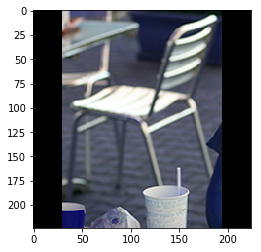

In [6]:
## pose annotations
img_list = open('../data/image_lists/pose/'+'_'.join([dataset,class_name,subset,'train_easy'])+'.txt').readlines()
if dataset=='pascal3D':
    save_name = class_name+'_'+subset
else:
    save_name = class_name
img_loc = os.path.join('../data/real_data',dataset,save_name)
i = np.random.choice(range(len(img_list)))
sample = img_list[i]
img = cv2.imread(os.path.join(img_loc,'images',sample.split(' ')[0]+'.png'))
plt.imshow(img)
pose = sample.split(' ')[1:]
print('Pose: Azimuth ',pose[0],";Elevation ",pose[1],';Tilt ',pose[2].strip())

(2, 130)


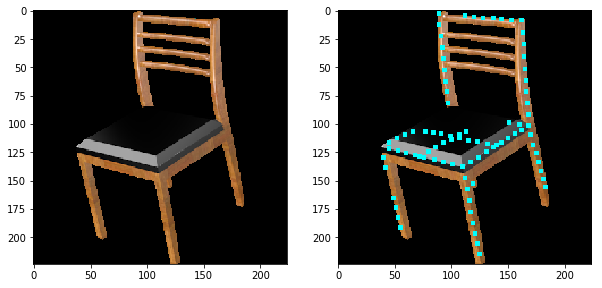

In [7]:
## dense keypoints for synthetic images
img_loc = '../data/synthetic_data/render_final/'
img_list = os.listdir(img_loc)
keypoint_loc = '../data/synthetic_data/dense_keypoints/'
i = np.random.choice(range(len(img_list)))
sample = img_list[i]
img = cv2.imread(os.path.join(img_loc,sample))
keypoints = np.load(os.path.join(keypoint_loc,sample.split('.')[0]+'.npy'))
keypoints = keypoints.astype(int)
m = 2
print(keypoints.shape)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
for i in range(130):
    img[keypoints[1,i]-m:keypoints[1,i]+m,keypoints[0,i]-m:keypoints[0,i]+m] = (255,255,0)
plt.subplot(1,2,2)
plt.imshow(img[:,:,::-1])


(540, 960)


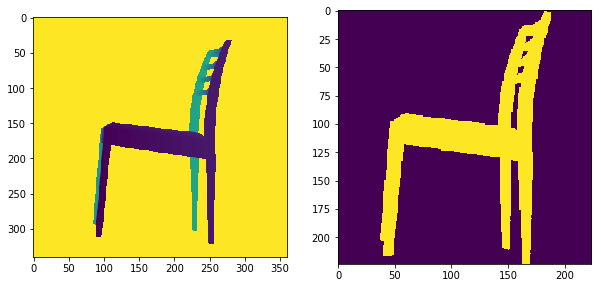

In [8]:
## depth and alpha map
depth_loc = '../data/synthetic_data/depth/'
alpha_loc = '../data/synthetic_data/alpha/'
img_list = os.listdir(depth_loc)
i = np.random.choice(range(len(img_list)))
sample = img_list[i]
depth = run_proj.get_depthmap_from_exr(os.path.join(depth_loc,sample))
print(depth.shape)
depth = np.clip(depth[100:440,300:660],0,3.5)

img_list = os.listdir(alpha_loc)
sample = [i for i in img_list if sample[:-9] in i][0]
alpha = np.load(os.path.join(alpha_loc,sample))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).imshow(depth)
plt.subplot(1,2,2).imshow(alpha)

(224, 224, 2)


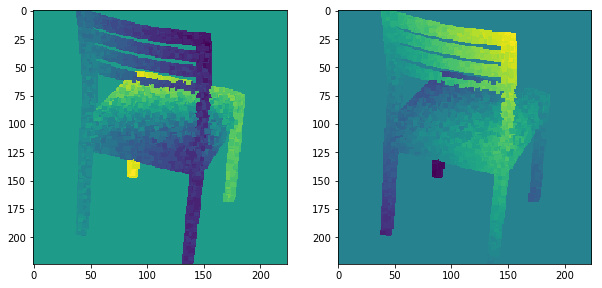

In [10]:
## disparity map
disparity_loc = '../data/synthetic_data/disparity/'
img_list = os.listdir(disparity_loc)
i = np.random.choice(range(len(img_list)))
sample = img_list[i]
disparity = np.load(os.path.join(disparity_loc,sample))
print(disparity.shape)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).imshow(disparity[:,:,0])
plt.subplot(1,2,2).imshow(disparity[:,:,1])
#plt.imshow(keypoints[:,:,1])